# 4. Machine learning model
---
_Note: this model uses the diabetes dataset, already analyzed in the decision tree project_

### 4.0. Libraries and dataset

In [2]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

# DATASET
train_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\Random-forest-project\data\processed\early_x_train.csv')
test_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\Random-forest-project\data\processed\early_x_test.csv')
target = 'Outcome'

# SPLIT X AND Y
X_train = train_data.drop([target], axis = 1)
y_train = train_data[target]
X_test = test_data.drop([target], axis = 1)
y_test = test_data[target]

### 4.1. model initialization and training 

In [3]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.2. model graph

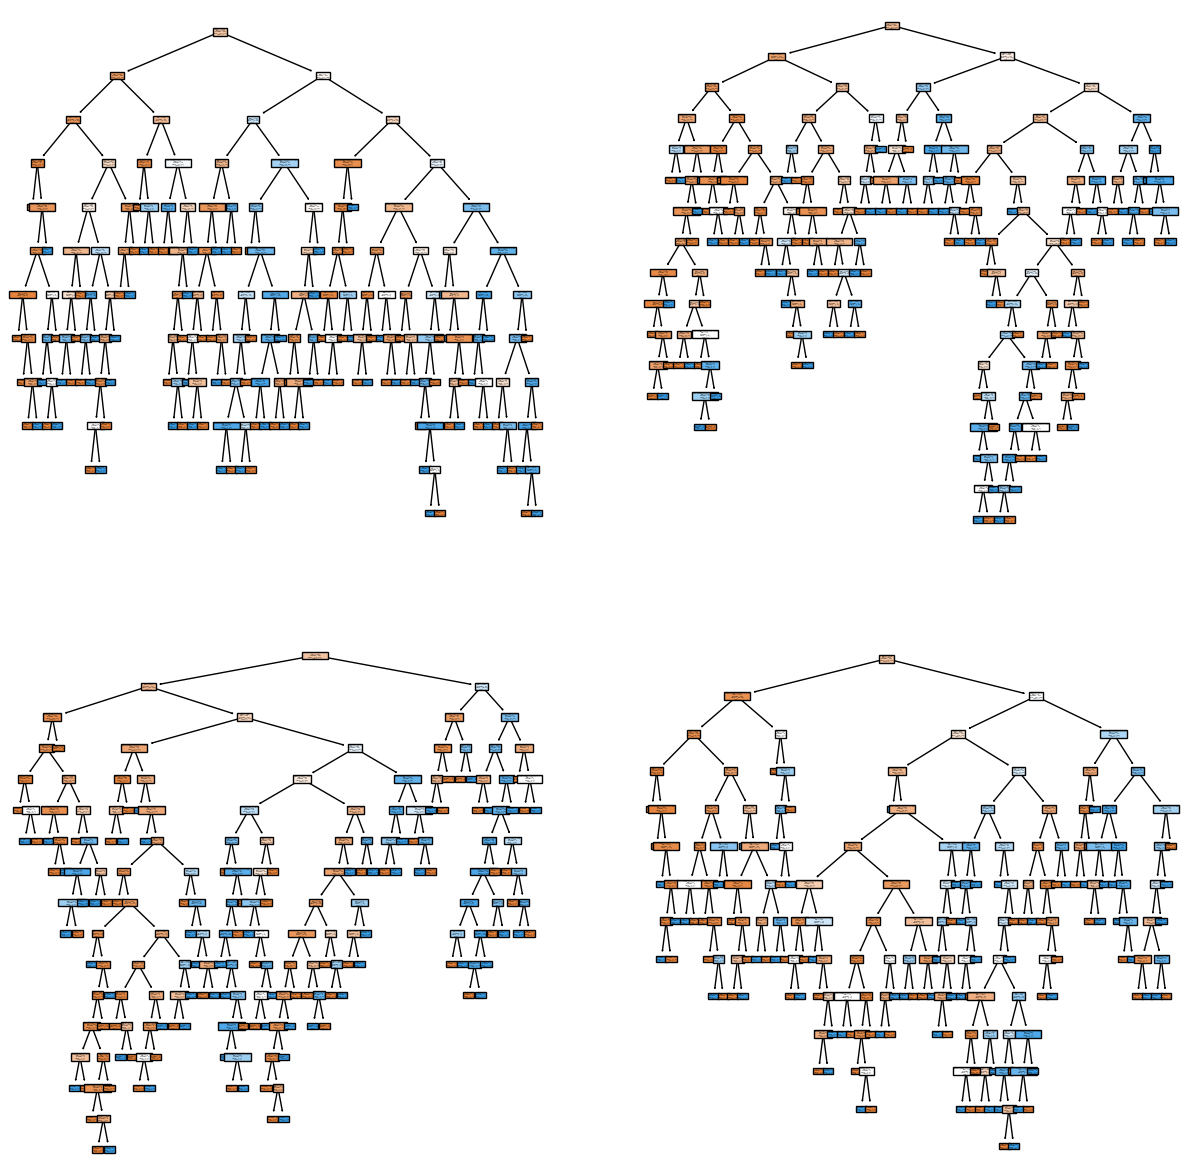

In [4]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))
# SHOW FIRST 4 TREES
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()


### 4.3. model prediction

In [5]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

### 4.4. model accuracy (score)


In [6]:
accuracy_score(y_test, y_pred)

0.7207792207792207

_NOTE: Since the total score is low, the model optimization will be performed._

### 4.5.model optimization

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [30,50,80,100],
    "bootstrap": [True, False],  
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 6)),
    "min_samples_split": [20,40,50,60], 
    "min_samples_leaf": [10,15,20]  
}
grid = GridSearchCV(model, param_grid, scoring = "accuracy", cv = 10)
grid


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                              min_samples_split=50,
                                              n_estimators=51),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [20, 40, 50, 60],
                         'n_estimators': [30, 50, 80, 100]},
             scoring='accuracy')

In [31]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 80}


### 4.6. optimized model training

In [32]:
model = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 4, min_samples_leaf= 20, min_samples_split= 50, n_estimators= 80)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=50,
                       n_estimators=80)

In [33]:
y_pred = model.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

0.7662337662337663

### 4.7. saving the model